In [1]:
import pymongo as pm
import gridfs

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pylab

from scipy import misc
import os
import time

In [2]:
import jupyter_utils as utils
import importlib
importlib.reload(utils)

<module 'jupyter_utils' from '/home/chengxuz/VIE/notebook/jupyter_utils.py'>

In [3]:
conn_7 = pm.MongoClient(port=27007)

# Performance monitor

We show our performance trajectory of VIE-3DResNet below (the first two calls of `utils.show_val_in_tfutils`), aslo as an example of showing model performance when it is trained using tfutils.
The next two calls of `utils.show_val` are examples of showing the direct training trajectories.
We also print out the performance numbers so you can compare your trajectory to ours to confirm whether your training works or not, as you cannot rerun the `utils.show_val_in_tfutils`.

[0.00330822 0.00315554 0.00524226 0.00646376 0.00895766 0.01257125
 0.02921417 0.04178542 0.05725774 0.0685057 ]
[0.08489414 0.0950224  0.09792345 0.11212337 0.11792549 0.12591612
 0.12209895 0.12566164 0.14266083 0.14576547 0.15095684 0.15054968
 0.15818404 0.16373168 0.16617468 0.16200122 0.15523209 0.17146784
 0.17808428 0.1802219  0.18067996 0.18515879 0.18765269 0.18205415
 0.19208062 0.18429357 0.1874491  0.19610138 0.19630496 0.19793363
 0.19803542 0.1994096  0.20042752 0.20709486 0.20872353 0.20648412
 0.21732491 0.21019951 0.20943607 0.21177728 0.21019951 0.2115228
 0.21712133 0.20862174 0.21605252 0.21208265 0.21941164 0.20363396
 0.2211421  0.21472923 0.21478014 0.22027688 0.22322883 0.21757939
 0.21946254 0.21600163 0.21432208 0.22943811 0.22638437 0.22831841
 0.22679153 0.21864821 0.23284812 0.22338152 0.23228827 0.23620725
 0.22541735 0.23462948 0.24017711 0.21905537 0.23737785 0.2332553
 0.23534203 0.23422231 0.24083877 0.2186991  0.22740228 0.24185668
 0.23274633 0.2362

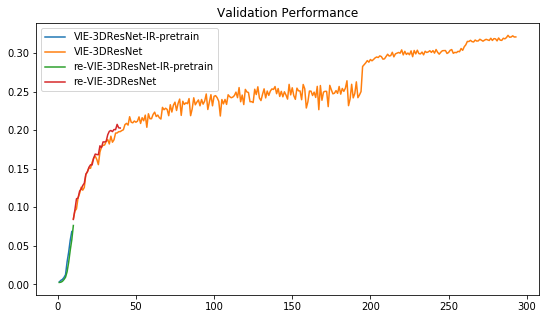

In [48]:
importlib.reload(utils)

kwargs = {
    'key': 'top1_10NN',
    'conn': conn_7,
    'colname': 'dyn_clstr',
    'dbname': 'vd_unsup_fx',
}

curr_expid = 'vd_3dresnet_IR'
print(utils.show_val_in_tfutils(curr_expid, new_figure=True, batch_watch_end=10, label_now='VIE-3DResNet-IR-pretrain', **kwargs)[:10])

curr_expid = 'vd_3dresnet'
print(utils.show_val_in_tfutils(curr_expid, new_figure=False, batch_offset=10, label_now='VIE-3DResNet',  **kwargs))

kwargs = {
    'colname': 'dyn_clstr',
    'dbname': 'vd_unsup_fx',
    'cache_dir': '/mnt/fs4/chengxuz/video_pub_cache/',
    'new_figure': False,
}

curr_expid = 'vd_3dresnet_IR'
utils.show_val(curr_expid, batch_watch_end=11, label_now='re-VIE-3DResNet-IR-pretrain', **kwargs)

curr_expid = 'vd_3dresnet'
utils.show_val(curr_expid, batch_offset=10, label_now='re-VIE-3DResNet',  **kwargs)
pass

# Transfer to Kinetics

[0.36349756 0.38202362 0.39037052 0.39601995 0.39978624 0.40390879
 0.40375611 0.40217834 0.40874389 0.40813314 0.40655537 0.40976181
 0.4086421  0.40726792 0.41067793 0.4061991  0.42380904 0.42497964
 0.42574308 0.42533591 0.42609935 0.42818607 0.42996743 0.42894951
 0.42726995 0.42940757 0.42935668 0.42864414 0.42986564 0.43093445
 0.43017101 0.4302728  0.4290513  0.42900041 0.42900041 0.43067997
 0.42894951 0.4303237  0.43012011 0.43200326 0.42956026 0.43185057
 0.43129072 0.42961116 0.43246132 0.43179967 0.42966205 0.4314434
 0.4327158  0.43067997 0.4339373  0.43322476 0.43358103 0.43449715
 0.43408998 0.43332655 0.43368282 0.43403909 0.43424267 0.43378461
 0.43408998 0.43475163 0.43429357 0.4338864  0.43414088 0.43449715
 0.43419178 0.43424267 0.43449715 0.43408998 0.43414088 0.43475163
 0.43444625 0.43485342 0.43480252 0.43434446 0.43444625 0.43419178
 0.43454805 0.43500611 0.43434446 0.4351079  0.43424267 0.43464984
 0.43398819 0.435057   0.43546417 0.43414088 0.43470073 0.43424

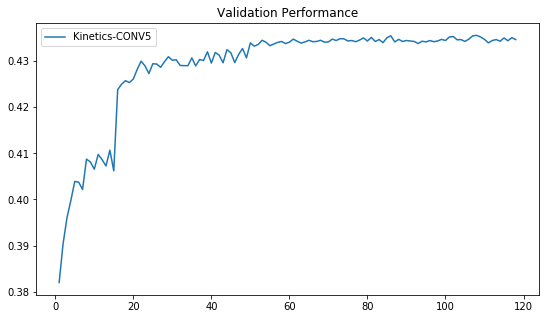

In [13]:
importlib.reload(utils)

kwargs = {
    'conn': conn_7,
    'colname': 'KN',
    'dbname': 'vd_trans',
}

curr_expid = 'vd_3dresnet_trans_all'
print(utils.show_val_in_tfutils(
    curr_expid, new_figure=True, label_now='Kinetics-CONV5', key='top1_9', **kwargs))

[0.27346295 0.30674878 0.31692793 0.32787052 0.32181393 0.33616653
 0.33575936 0.34166327 0.34354642 0.3413579  0.35067182 0.34807614
 0.34909406 0.34909406 0.35280945 0.34313925 0.39286441 0.39856474
 0.39973534 0.39993893 0.3990737  0.40095684 0.40477402 0.40375611
 0.40492671 0.40538477 0.40497761 0.4050794  0.40528298 0.4063009
 0.40614821 0.40670806 0.40589373 0.40523208 0.40680985 0.40482492
 0.40289088 0.4074715  0.40543567 0.40792956 0.40691164 0.41067793
 0.40716612 0.40355252 0.40711523 0.40792956 0.40848941 0.40940554
 0.41337541 0.41006718 0.40950733 0.41154316 0.4134263  0.41408795
 0.41393526 0.41597109 0.41327362 0.4134263  0.41566572 0.41500407
 0.41541124 0.41449511 0.41398616 0.41500407 0.41490228 0.4146478
 0.41454601 0.41368078 0.41525855 0.4134772  0.41362989 0.41444422
 0.41322272 0.41352809 0.41525855 0.41393526 0.4158693  0.41454601
 0.4146478  0.41530945 0.41541124 0.41541124 0.41561482 0.41571661
 0.41454601 0.41597109 0.41556393 0.4158693  0.41485138 0.414291

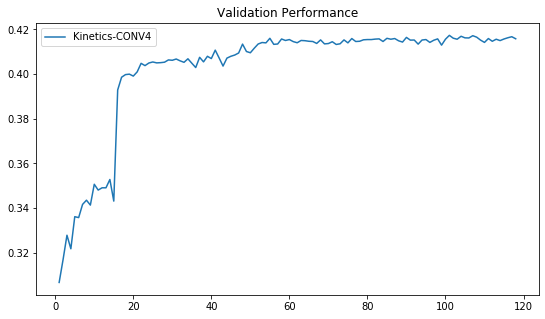

In [14]:
importlib.reload(utils)

kwargs = {
    'conn': conn_7,
    'colname': 'KN',
    'dbname': 'vd_trans',
}

curr_expid = 'vd_3dresnet_trans_all'
print(utils.show_val_in_tfutils(
    curr_expid, new_figure=True, label_now='Kinetics-CONV4', key='top1_7', **kwargs))

[0.15971091 0.1815452  0.1946763  0.19986767 0.20566979 0.20734935
 0.20388844 0.20806189 0.20612785 0.21478013 0.22200733 0.21478013
 0.20999593 0.20831637 0.21055578 0.20780741 0.29163274 0.29458469
 0.30079397 0.30679967 0.3052728  0.30669788 0.31270358 0.31138029
 0.3101079  0.30827565 0.31194015 0.30898819 0.31458673 0.31641897
 0.310057   0.31596091 0.31178746 0.31316164 0.31417956 0.31585912
 0.30863192 0.31214373 0.31153298 0.31916735 0.31896376 0.31555375
 0.31662256 0.3136706  0.3172842  0.32110138 0.3196763  0.31876018
 0.32130497 0.32145765 0.31570643 0.33005904 0.3305171  0.33240024
 0.33326547 0.33377443 0.33072068 0.33072068 0.33392712 0.33224756
 0.33128054 0.33402891 0.33362174 0.33372353 0.33285831 0.33458876
 0.33586116 0.33270562 0.33326547 0.33362174 0.33270562 0.33362174
 0.33382533 0.33316368 0.33163681 0.3329601  0.33392712 0.33224756
 0.33372353 0.33204397 0.33489414 0.3340798  0.33525041 0.33382533
 0.3341307  0.33265472 0.33443607 0.33301099 0.33479235 0.3336

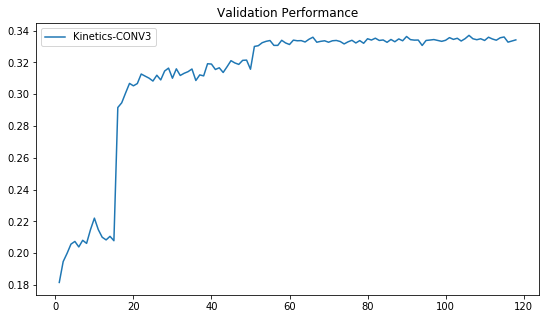

In [15]:
importlib.reload(utils)

kwargs = {
    'conn': conn_7,
    'colname': 'KN',
    'dbname': 'vd_trans',
}

curr_expid = 'vd_3dresnet_trans_all'
print(utils.show_val_in_tfutils(
    curr_expid, new_figure=True, label_now='Kinetics-CONV3', key='top1_5', **kwargs))

# Transfer to ImageNet

[0.12149888 0.23121399 0.25654209 0.26850593 0.27628842 0.28004962
 0.28379083 0.287512   0.28835228 0.29009283 0.29297376 0.29083306
 0.29373398 0.29277369 0.29495439 0.29291373 0.29423416 0.29541454
 0.29571462 0.29673496 0.29953584 0.29913571 0.29789531 0.29775527
 0.29467431 0.29771528 0.29635483 0.29743516 0.2965349  0.3099992
 0.31364036 0.31348032 0.31666133 0.31688139 0.3162812  0.31666133
 0.31912211 0.31914213 0.318782   0.31802177 0.31918213 0.3209227
 0.31850192 0.31892204 0.32114276 0.3193422  0.32074264 0.3200424
 0.32050255 0.3200424  0.32124281 0.32166293 0.32006243 0.32156289
 0.32166293 0.32048255 0.32076263 0.32150289 0.3222231  0.32256323
 0.32182297 0.32266325 0.3231234  0.32298335 0.32302338 0.32138285
 0.32162291 0.3222231  0.32200304 0.32296336 0.3209627  0.32294333
 0.3231234  0.32292333 0.32272327 0.32216311 0.32306337 0.32396367
 0.32410371 0.32260323 0.32260323 0.32206306 0.32316342 0.32202303
 0.32232314 0.32374361 0.3222031  0.32392365 0.32296336 0.3246438

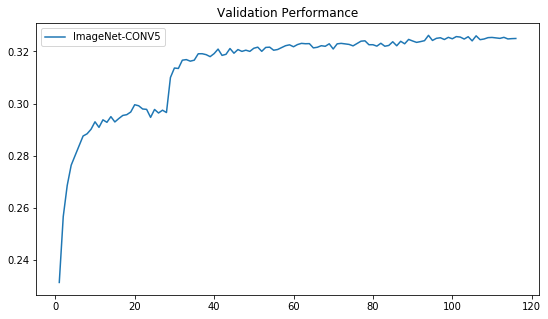

In [16]:
importlib.reload(utils)

kwargs = {
    'conn': conn_7,
    'colname': 'IN',
    'dbname': 'vd_trans',
}

curr_expid = 'vd_3dresnet_trans_all'
print(utils.show_val_in_tfutils(
    curr_expid, new_figure=True, label_now='ImageNet-CONV5', key='top1_9', **kwargs))

[0.09457026 0.21602912 0.24819942 0.25922295 0.26544493 0.27026647
 0.27946943 0.27644846 0.2825304  0.28102994 0.28269047 0.28599152
 0.28705186 0.28395087 0.28869238 0.28815222 0.28259042 0.28541133
 0.29037291 0.28771207 0.28853232 0.28897247 0.29195341 0.2884123
 0.28497118 0.28913254 0.29115316 0.2912932  0.28643167 0.32694462
 0.33136603 0.33122599 0.33672774 0.33612755 0.33848831 0.33968869
 0.3403089  0.34090909 0.34120917 0.34134924 0.34196943 0.34377
 0.34383002 0.34232953 0.34377    0.34557059 0.34537053 0.3424896
 0.34551057 0.34455025 0.34451026 0.34605074 0.34601071 0.34705105
 0.34461027 0.34493038 0.3453505  0.34581065 0.34613076 0.34557059
 0.34835148 0.34865156 0.34775129 0.34799135 0.34791133 0.34713107
 0.34711108 0.34745118 0.34813139 0.34825143 0.3471511  0.34891164
 0.34697104 0.34747118 0.34747118 0.34783131 0.34711108 0.350032
 0.34865156 0.3484315  0.34873161 0.34701103 0.34861156 0.3475312
 0.34777129 0.3487716  0.34809139 0.34817141 0.34757122 0.34785131
 0.

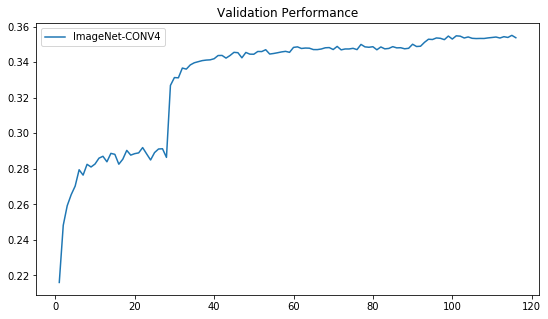

In [17]:
importlib.reload(utils)

kwargs = {
    'conn': conn_7,
    'colname': 'IN',
    'dbname': 'vd_trans',
}

curr_expid = 'vd_3dresnet_trans_all'
print(utils.show_val_in_tfutils(
    curr_expid, new_figure=True, label_now='ImageNet-CONV4', key='top1_7', **kwargs))

[0.05723832 0.12920134 0.14824744 0.15645006 0.16475272 0.16795374
 0.17035452 0.17077465 0.17523608 0.17283531 0.17607634 0.17895727
 0.17833707 0.17629641 0.17615637 0.17167494 0.17681658 0.178137
 0.17865717 0.17985755 0.18243837 0.18041773 0.17919734 0.17815702
 0.178137   0.18173815 0.17303537 0.18731995 0.17737676 0.23683579
 0.24683899 0.25146046 0.25596189 0.25994319 0.26340428 0.26632524
 0.26782569 0.27006641 0.27038652 0.27070662 0.27346751 0.27644846
 0.27502802 0.27436781 0.27726874 0.27556819 0.27944943 0.27630842
 0.27924937 0.28145006 0.2799896  0.28209028 0.28139004 0.28179017
 0.2821503  0.28275049 0.28487116 0.28255042 0.28391084 0.28299055
 0.28453106 0.28539133 0.2841109  0.28653169 0.2859115  0.2850312
 0.28599152 0.28727192 0.28673175 0.28787211 0.28631163 0.28941262
 0.28555137 0.28631163 0.28723192 0.28937259 0.28931257 0.28875241
 0.287512   0.28983274 0.28871238 0.28705186 0.28789213 0.28701183
 0.28743199 0.28855234 0.28995278 0.28619158 0.28833225 0.2878321

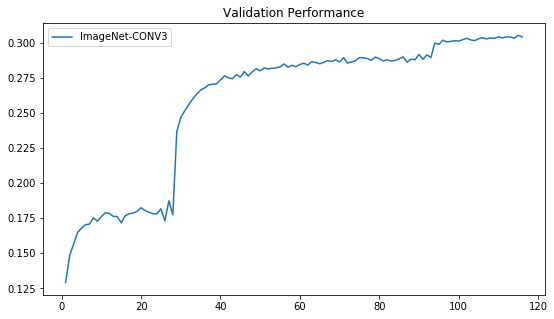

In [18]:
importlib.reload(utils)

kwargs = {
    'conn': conn_7,
    'colname': 'IN',
    'dbname': 'vd_trans',
}

curr_expid = 'vd_3dresnet_trans_all'
print(utils.show_val_in_tfutils(
    curr_expid, new_figure=True, label_now='ImageNet-CONV3', key='top1_5', **kwargs))